In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_excel(r'D:\6th Semester\ECN436 Risk Management and Financial Econometrics\COURSEWORK\CourseWork - 7\Oljas diplom data.xlsx', sheet_name = 'Sheet5')

In [3]:
df = df.dropna()

In [4]:
df = df.sample(100)

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df = pd.read_excel(r'D:\6th Semester\ECN436 Risk Management and Financial Econometrics\COURSEWORK\CourseWork - 7\Oljas diplom data.xlsx', sheet_name = 'Sheet7')

In [7]:
df['олгосон дүн'] = df['олгосон дүн'].astype(float)

In [8]:
df['хугацаа'] = df['дуусах огноо'] - df['эхлэх огноо']
df['хугацаа'] = df['хугацаа'].astype(str)

In [9]:
time = df['хугацаа'].str.split(' ', expand = True)
time = time.loc[:,[0]]
time = time.rename(columns = {0:'хугацаа1'})

In [10]:
df = pd.concat([df,time], axis = 1)

In [11]:
df['хугацаа1'] = df['хугацаа1'].astype(int)

In [12]:
df.describe()

,Unnamed: 0,д/д,хугацаа хэтэрсэн хоног,олгосон дүн,өрхийн гишүүдийн тоо,нас,нийт ажилласан жил,нийт ажилласан байгууллагын тоо,орлого,хугацаа1
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,72.880000,73.880000,112.160000,3.525810e+06,3.690000,40.590000,8.877000,1.240000,6.733532e+05,783.140000
std,43.350179,43.350179,177.833807,2.716582e+06,1.383123,11.559329,10.146093,0.985962,1.430342e+06,726.271439
min,1.000000,2.000000,0.000000,1.200000e+05,1.000000,21.000000,0.000000,0.000000,0.000000e+00,122.000000
25%,40.750000,41.750000,1.000000,1.290000e+06,3.000000,32.750000,2.000000,1.000000,1.479875e+05,366.000000
50%,71.500000,72.500000,15.000000,2.900000e+06,4.000000,39.500000,4.000000,1.000000,3.499750e+05,730.000000
75%,99.250000,100.250000,156.250000,5.000000e+06,5.000000,47.500000,15.000000,2.000000,5.030858e+05,810.250000
max,149.000000,150.000000,611.000000,1.000000e+07,7.000000,71.000000,43.000000,5.000000,9.393250e+06,5479.000000


In [13]:
df.columns

Index(['Unnamed: 0', 'д/д', 'эхлэх огноо', 'дуусах огноо',
       'хугацаа хэтэрсэн хоног', 'олгосон дүн', 'өрхийн гишүүдийн тоо', 'хүйс',
       'боловсрол', 'нас', 'байгууллагын ангилал', 'нийт ажилласан жил',
       'нийт ажилласан байгууллагын тоо', 'орон байр өөрийнх эсэх', 'орлого',
       'өмнөх зээл хугацаа хэтэрсэн эсэх',
       'одоо авсан зээлийг гэрээний бүтцэд өөрчлөлт оруулсан эсэх', 'хугацаа',
       'хугацаа1'],
      dtype='object')

In [14]:
df_new = df.loc[:,['хугацаа хэтэрсэн хоног','олгосон дүн','өрхийн гишүүдийн тоо','хүйс','боловсрол','нас','байгууллагын ангилал','нийт ажилласан жил','нийт ажилласан байгууллагын тоо','орон байр өөрийнх эсэх','орлого','өмнөх зээл хугацаа хэтэрсэн эсэх','одоо авсан зээлийг гэрээний бүтцэд өөрчлөлт оруулсан эсэх','хугацаа1']]

In [15]:
df_new.describe()

,хугацаа хэтэрсэн хоног,олгосон дүн,өрхийн гишүүдийн тоо,нас,нийт ажилласан жил,нийт ажилласан байгууллагын тоо,орлого,хугацаа1
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,112.160000,3.525810e+06,3.690000,40.590000,8.877000,1.240000,6.733532e+05,783.140000
std,177.833807,2.716582e+06,1.383123,11.559329,10.146093,0.985962,1.430342e+06,726.271439
min,0.000000,1.200000e+05,1.000000,21.000000,0.000000,0.000000,0.000000e+00,122.000000
25%,1.000000,1.290000e+06,3.000000,32.750000,2.000000,1.000000,1.479875e+05,366.000000
50%,15.000000,2.900000e+06,4.000000,39.500000,4.000000,1.000000,3.499750e+05,730.000000
75%,156.250000,5.000000e+06,5.000000,47.500000,15.000000,2.000000,5.030858e+05,810.250000
max,611.000000,1.000000e+07,7.000000,71.000000,43.000000,5.000000,9.393250e+06,5479.000000


In [16]:
df_new.reset_index(inplace = True)

In [17]:
del df_new['index']

In [18]:
df_new = df_new.rename(columns = {
    'хугацаа хэтэрсэн хоног':'late',
    'олгосон дүн':'loan',
    'өрхийн гишүүдийн тоо':'family_members',
    'хүйс':'gender',
    'боловсрол':'education',
    'нас':'age',
    'байгууллагын ангилал':'job',
    'нийт ажилласан жил':'experience',
    'нийт ажилласан байгууллагын тоо':'worked_org',
    'орон байр өөрийнх эсэх':'house',
    'орлого':'income',
    'өмнөх зээл хугацаа хэтэрсэн эсэх':'overdue',
    'одоо авсан зээлийг гэрээний бүтцэд өөрчлөлт оруулсан эсэх':'contract',
    'хугацаа1':'time'
})

In [19]:
gender = pd.get_dummies(df_new['gender'])
educ = pd.get_dummies(df_new['education'])
job = pd.get_dummies(df_new['job'])
house = pd.get_dummies(df_new['house'])
overdue = pd.get_dummies(df_new['overdue'])
contract = pd.get_dummies(df_new['contract'])

In [20]:
#Хүйс
gender = gender.rename(columns = {'Эр':'gender_m','Эм':'gender_f'})
gender = gender.loc[:,['gender_f']]

In [21]:
#Боловсрол
#edu1 = pd.DataFrame(educ.loc[:,['Бага','Боловсролгүй','Бүрэн дунд','Дунд']].sum(axis = 1), columns = ['edu_lower'])
edu2 = pd.DataFrame(educ.loc[:,['Дээд','Техник мэргэжлийнх']].sum(axis = 1), columns = ['edu_high'])
#edu = pd.concat([edu1,edu2], axis = 1)

In [22]:
#Ажил эрхлэлт
#job1 = pd.DataFrame(job.loc[:,['Ажилгүй','мал малладаг']].sum(axis = 1), columns = ['no_job'])
job2 = pd.DataFrame(job.loc[:,['Төрийн оролцоотой байгууллага','Төрийн үйлчилгээний байгууллага','Хувийн бизнес эрхлэдэг','Хувийн дунд зэрэг байгууллага','Хувийн жижиг байгууллага','Хувийн томоохон байгууллага']].sum(axis = 1), columns = ['has_job'])
#job_new = pd.concat([job1, job2], axis = 1)

In [23]:
#Өөрийн байртай эсэх
house1 = pd.DataFrame(house.loc[:,['Өөрийн']].sum(axis = 1), columns = ['house1'])
house2 = pd.DataFrame(house.loc[:,['Түрээсийн']].sum(axis = 1), columns = ['house2'])
house3 = pd.DataFrame(house.loc[:,['Садан төрлийн','Эцэг, эхийн']].sum(axis = 1), columns = ['house3'])
house_new = pd.concat([house1, house2, house3], axis = 1)

In [24]:
#Хугацаа хэтэрсэн эсэх
#overdue1 = pd.DataFrame(overdue.loc[:,['Тийм','Хугацаа хэтэрсэн']].sum(axis = 1), columns = ['overdue'])
overdue2 = pd.DataFrame(overdue.loc[:,['Хугацаа хэтрээгүй']].sum(axis = 1), columns = ['not_overdue'])
#overdue_new = pd.concat([overdue1, overdue2], axis = 1)

In [25]:
#Зээлийн гэрээнд өөрчлөлт орсон эсэх
contract1 = pd.DataFrame(contract.loc[:,['Тийм']].sum(axis = 1), columns = ['contract_yes'])
#contract2 = pd.DataFrame(contract.loc[:,['Үгүй','үгүй']].sum(axis = 1), columns = ['contract_no'])
#contract_new = pd.concat([contract1,contract2], axis = 1)

In [26]:
numerical = df_new.loc[:,['late','loan','family_members','age','experience','worked_org','income','time']]

In [27]:
data = pd.concat([numerical,gender,edu2,job2,house_new,overdue2,contract1], axis = 1)

In [28]:
age1 = data[data['age'] <= 25].loc[:,['age']]
age1 = age1.rename(columns = {'age':'age1'})
age1.loc[(age1['age1'] <= 25)] = 1

age2 = data[(data['age'] > 25) & (data['age'] <= 35)].loc[:,['age']]
age2 = age2.rename(columns = {'age':'age2'})
age2.loc[(age2['age2'] > 25) & (age2['age2'] <=35), 'age2'] = 1

age3 = data[(data['age'] > 35) & (data['age'] <= 45)].loc[:,['age']]
age3 = age3.rename(columns = {'age':'age3'})
age3.loc[(age3['age3'] > 35) & (age3['age3'] <= 45), 'age3'] = 1

age4 = data[data['age'] > 45].loc[:,['age']]
age4 = age4.rename(columns = {'age':'age4'})
age4.loc[(age4['age4'] > 45)] = 1

In [29]:
del data['age']

In [30]:
data = pd.concat([data,age1,age2,age3,age4], axis = 1)

In [31]:
data['age1'] = data['age1'].fillna(0)
data['age2'] = data['age2'].fillna(0)
data['age3'] = data['age3'].fillna(0)
data['age4'] = data['age4'].fillna(0)

In [32]:
data['age1'] = data['age1'].astype(int)
data['age2'] = data['age2'].astype(int)
data['age3'] = data['age3'].astype(int)
data['age4'] = data['age4'].astype(int)

In [33]:
data.columns

Index(['late', 'loan', 'family_members', 'experience', 'worked_org', 'income',
       'time', 'gender_f', 'edu_high', 'has_job', 'house1', 'house2', 'house3',
       'not_overdue', 'contract_yes', 'age1', 'age2', 'age3', 'age4'],
      dtype='object')

In [34]:
#OLS MODEL
y = data[['late']]
x = data[['loan','family_members', 'experience', 'worked_org', 'income','gender_f', 'edu_high', 'has_job','house1', 'house2', 'house3', 'not_overdue','contract_yes', 'age1', 'age2', 'age3', 'age4']]
x = sm.add_constant(x)


model = sm.OLS(y,x).fit()


#Парамертүүдийг ялгаж авах
params = pd.DataFrame(model.params, columns = ['Коэффициент'])
std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
rsquared = model.rsquared

#Dataframe болгох
model_df = pd.concat([params,std,t_stat,p_value], axis = 1)


#Коэффициеэт тохируулах
model_df['Коэффициент'] = model_df['Коэффициент'].astype(np.float64)
model_df['Стандарт алдаа'] = model_df['Стандарт алдаа'].astype(np.float64)
model_df['t статистик'] = model_df['t статистик'].astype(np.float64)
model_df['Магадлал'] = model_df['Магадлал'].astype(np.float64)

print(f'Model1 "R квадрат нь": {rsquared}')
model_df.to_clipboard()

Model1 "R квадрат нь": 0.25707799040585955


In [35]:
#Ач холбогдолтой параметрүүдийг ялгаж авах
model_df[(model_df['Магадлал'] < 0.15)]

,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,136.149280,49.722939,2.738158,0.007541
loan,0.000012,0.000007,1.613315,0.110427
family_members,-28.504331,13.726972,-2.076520,0.040902
experience,-3.554541,2.255435,-1.575989,0.118787
income,-0.000025,0.000013,-1.874328,0.064361
house1,60.661343,33.823805,1.793451,0.076500
house3,94.479932,46.357513,2.038072,0.044689
contract_yes,144.902156,60.306539,2.402760,0.018475
age3,79.575729,34.304701,2.319674,0.022786


In [36]:
#OLS MODEL
y = data[['late']]
x = data[['loan','family_members', 'experience','income','house1','house3','contract_yes','age3']]
x = sm.add_constant(x)


model = sm.OLS(y,x).fit()


#Парамертүүдийг ялгаж авах
params = pd.DataFrame(model.params, columns = ['Коэффициент'])
std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
rsquared = model.rsquared

#Dataframe болгох
model_df = pd.concat([params,std,t_stat,p_value], axis = 1)


#Коэффициеэт тохируулах
model_df['Коэффициент'] = model_df['Коэффициент'].astype(np.float64)
model_df['Стандарт алдаа'] = model_df['Стандарт алдаа'].astype(np.float64)
model_df['t статистик'] = model_df['t статистик'].astype(np.float64)
model_df['Магадлал'] = model_df['Магадлал'].astype(np.float64)

print(f'Model1 "R квадрат нь": {rsquared}')
model_df.to_clipboard()

Model1 "R квадрат нь": 0.2095853395834255


In [37]:
#Variance inflation Factor
vif = 1/(1-rsquared)
print(vif)

1.2651587199470302


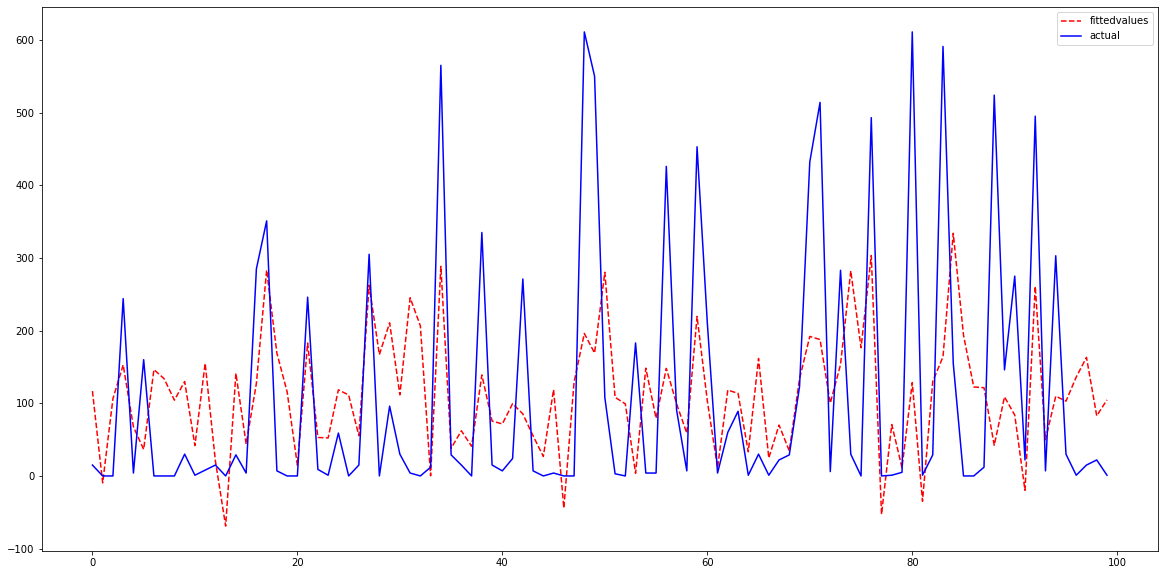

In [48]:
#Үнэлэгдсэн утга болон ажиглагдсан утгуудыг дүрслэх
y1 = model.fittedvalues
y2 = data['late']

plt.figure(figsize=(20, 10))
plt.plot(y1, 'r--', label='fittedvalues')
plt.plot(y2, 'b-', label='actual')
plt.legend()

plt.savefig('graph.png')

In [39]:
#heteroskedasticity 
from statsmodels.compat import lzip
resid = model.resid

# perform the het_breuschpagan test
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan(resid, x)
lzip(name, test)

[('Lagrange multiplier statistic', 15.77050876204339),
 ('p-value', 0.04578512804184471),
 ('f-value', 2.12977111142047),
 ('f p-value', 0.04068295196260258)]

In [40]:
#LOGIT MODEL
y_logit = data[['not_overdue']]
x_logit = data[['loan','family_members', 'experience', 'worked_org', 'income','time','gender_f', 'edu_high', 'has_job','house1', 'house2', 'house3','contract_yes', 'age1', 'age2', 'age3', 'age4']]
x_logit = sm.add_constant(x_logit)

model_logit = sm.Logit(y_logit, x_logit).fit()

#Парамертүүдийг ялгаж авах
params_logit = pd.DataFrame(model_logit.params, columns = ['Коэффициент'])
std_logit = pd.DataFrame(model_logit.bse, columns = ['Стандарт алдаа'])
t_stat_logit = pd.DataFrame(model_logit.tvalues, columns = ['t статистик'])
p_value_logit = pd.DataFrame(model_logit.pvalues, columns = ['Магадлал'])



#Dataframe болгох
model_df_logit = pd.concat([params_logit,std_logit,t_stat_logit,p_value_logit], axis = 1)

model_df_logit

Optimization terminated successfully.
         Current function value: 0.321330
         Iterations 8


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,1.349454e+00,NaN,NaN,NaN
loan,3.762795e-07,2.439370e-07,1.542527e+00,0.122946
family_members,5.250377e-02,2.640440e-01,1.988448e-01,0.842384
experience,9.557276e-02,6.274226e-02,1.523260e+00,0.127694
worked_org,-1.465673e-01,3.453937e-01,-4.243486e-01,0.671312
income,-2.668223e-07,2.634333e-07,-1.012865e+00,0.311125
time,-4.312249e-04,8.976633e-04,-4.803860e-01,0.630953
gender_f,1.190854e+00,8.660506e-01,1.375040e+00,0.169119
edu_high,-8.062276e-02,8.045537e-01,-1.002081e-01,0.920179
has_job,-2.036588e+00,1.150641e+00,-1.769959e+00,0.076734


In [47]:
#LOGIT MODEL
y_logit_1 = data[['not_overdue']]
x_logit_1 = data[['loan', 'experience', 'has_job','contract_yes']]
x_logit_1 = sm.add_constant(x_logit_1)

model_logit_1 = sm.Logit(y_logit_1, x_logit_1).fit()

#Парамертүүдийг ялгаж авах
params_logit_1 = pd.DataFrame(model_logit_1.params, columns = ['Коэффициент'])
std_logit_1 = pd.DataFrame(model_logit_1.bse, columns = ['Стандарт алдаа'])
t_stat_logit_1 = pd.DataFrame(model_logit_1.tvalues, columns = ['t статистик'])
p_value_logit_1 = pd.DataFrame(model_logit_1.pvalues, columns = ['Магадлал'])



#Dataframe болгох
model_df_logit_1 = pd.concat([params_logit_1,std_logit_1,t_stat_logit_1,p_value_logit_1], axis = 1)

model_df_logit_1

Optimization terminated successfully.
         Current function value: 0.343220
         Iterations 7


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,2.262042e+00,9.556290e-01,2.367072,0.017929
loan,2.305381e-07,1.419875e-07,1.623651,0.104450
experience,7.400790e-02,4.405182e-02,1.680019,0.092954
has_job,-1.901722e+00,9.052715e-01,-2.100720,0.035666
contract_yes,-1.625739e+00,9.226548e-01,-1.762024,0.078065


In [42]:
model_df_logit[model_df_logit['Магадлал'] < 0.15]

,Коэффициент,Стандарт алдаа,t статистик,Магадлал
loan,3.762795e-07,2.439370e-07,1.542527,0.122946
experience,9.557276e-02,6.274226e-02,1.523260,0.127694
has_job,-2.036588e+00,1.150641e+00,-1.769959,0.076734
contract_yes,-2.250042e+00,1.181444e+00,-1.904485,0.056847


In [43]:
model_df[(model_df['Магадлал'] < 0.15)]

,Коэффициент,Стандарт алдаа,t статистик,Магадлал
loan,0.000011,0.000007,1.647748,0.102853
family_members,-23.741430,12.968791,-1.830659,0.070425
income,-0.000025,0.000013,-1.977518,0.051009
house3,109.370032,73.846287,1.481050,0.142048
contract_yes,178.071643,53.893003,3.304170,0.001363


In [71]:
filt = 'has_job'

len(data[(data[filt] == 0) & (data['not_overdue'] == 0)])

2

In [72]:
len(data[(data[filt] == 0)])

34

In [81]:
len(data[(data[filt] == 0)])

34

In [83]:
data.to_clipboard()